# Historical price of stock GameStop Corp. CI A
Price information can found at BI Elite Training website, that was obtained from Kaggle:

https://www.kaggle.com/iainmcintosh/wsb-gme-reddit-submission-vs-stock-price?select=stockticker_history.csv

# WallStreetBets reddit community posts 
Data from subreddit community WallStreetBets posts history was obtained on Kaggle website:

https://training.bielite.com/topic/gamestop-stock-and-reddit-datasets/

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# get datasets into a dataframe format

# GME storical prices 
price_filepath = "./k_stockticker_history.csv"
reddit_wsb_filepath = "./r_wallstreetbets_posts.csv"
# WallStreetBets posts
prices = pd.read_csv(price_filepath)
reddit_wsb = pd.read_csv(reddit_wsb_filepath)

## GameStop historical price 

In [3]:
# describe stock GME prices dataframe
prices.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4774.000000,4774.000000,4774.000000,4774.000000,4.774000e+03,4774.000000,4774.000000
mean,16.964524,17.357234,16.564974,16.947438,3.408100e+06,0.002003,0.000419
std,12.416453,14.305795,10.499804,11.886968,6.581594e+06,0.026113,0.028946
min,2.575373,2.689834,2.524876,2.555174,6.500000e+04,0.000000,0.000000
25%,9.545000,9.864478,9.290386,9.612202,1.528950e+06,0.000000,0.000000
50%,15.474373,15.789952,15.178094,15.482793,2.493200e+06,0.000000,0.000000
75%,22.229197,22.535772,21.846621,22.209757,3.794000e+06,0.000000,0.000000
max,379.709991,483.000000,250.000000,347.510010,1.967843e+08,0.380000,2.000000


In [4]:
# rows and columns size
prices.shape

(4774, 8)

In [5]:
# visualizing first 5 rows of dataframe 
prices.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


In [6]:
prices.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [7]:
# visualizing last 5 rows of dataframe 
prices.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4769,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000,0.0,0.0
4770,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000,0.0,0.0
4771,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700,0.0,0.0
4772,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800,0.0,0.0
4773,2021-01-29,379.709991,413.980011,250.000000,325.000000,50397132,0.0,0.0


In [8]:
# missing values, does not have any
prices.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
# sorting dataframe by date, ascending order from older to newer
prices = prices.sort_values(by='Date')
prices.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


Text(0.5, 1.0, 'Closing price of GameStop stock')

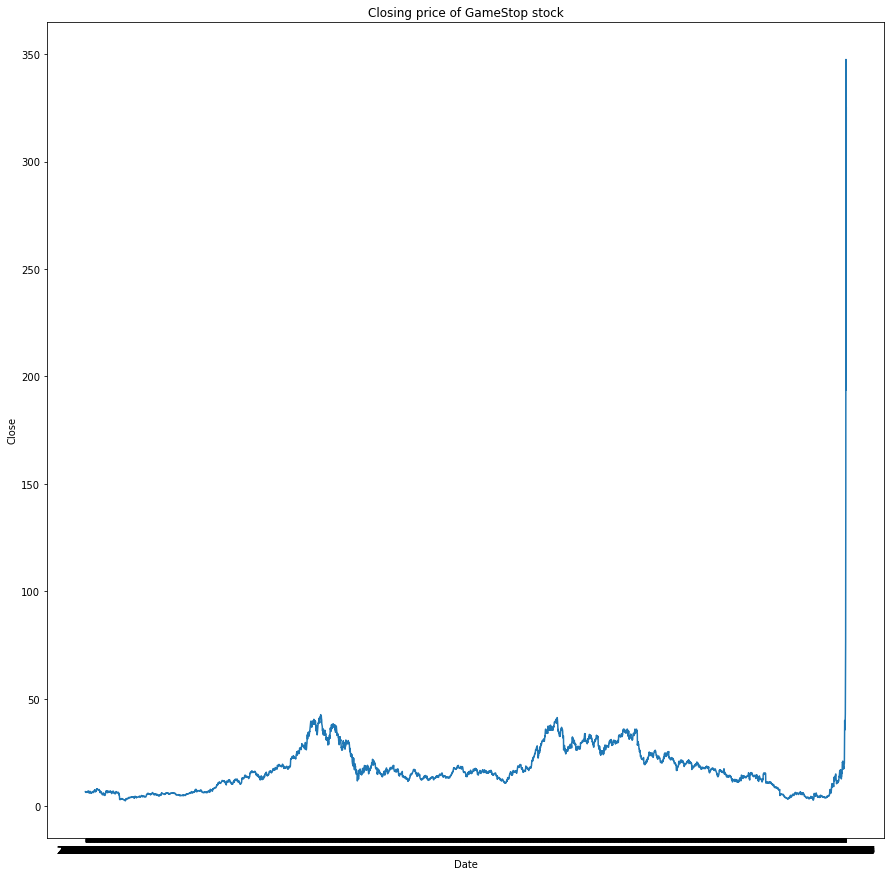

In [10]:
# plotting closing prices for stock 

plt.figure(figsize=(15,15))
sns.lineplot(x = prices['Date'], y = prices['Close'])
plt.title('Closing price of GameStop stock')

In [11]:
# since we are looking into what happened during the last months of 2020 and beginning of 2021
# lets look at the price closing since August of 2020, to understand the jump in price better

prices_aug_jan = prices.loc[(prices['Date'] >= '2020-08-01')]

prices_aug_jan.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4649,2020-08-03,4.03,4.25,4.00,4.15,2517600,0.0,0.0
4650,2020-08-04,4.13,4.74,4.13,4.43,10361400,0.0,0.0
4651,2020-08-05,4.50,4.76,4.25,4.63,4925700,0.0,0.0
4652,2020-08-06,4.60,4.66,4.38,4.43,1901200,0.0,0.0
4653,2020-08-07,4.39,4.40,4.06,4.16,3341100,0.0,0.0


In [12]:
# shape of new dataframe, selecting price information from August 2020 until January 2021
prices_aug_jan.shape

(125, 8)

In [13]:
# looking at last 5 row information
prices_aug_jan.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4769,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000,0.0,0.0
4770,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000,0.0,0.0
4771,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700,0.0,0.0
4772,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800,0.0,0.0
4773,2021-01-29,379.709991,413.980011,250.000000,325.000000,50397132,0.0,0.0


Text(0.5, 1.0, 'Closing price of GameStop stock - August 2020 to January 2021')

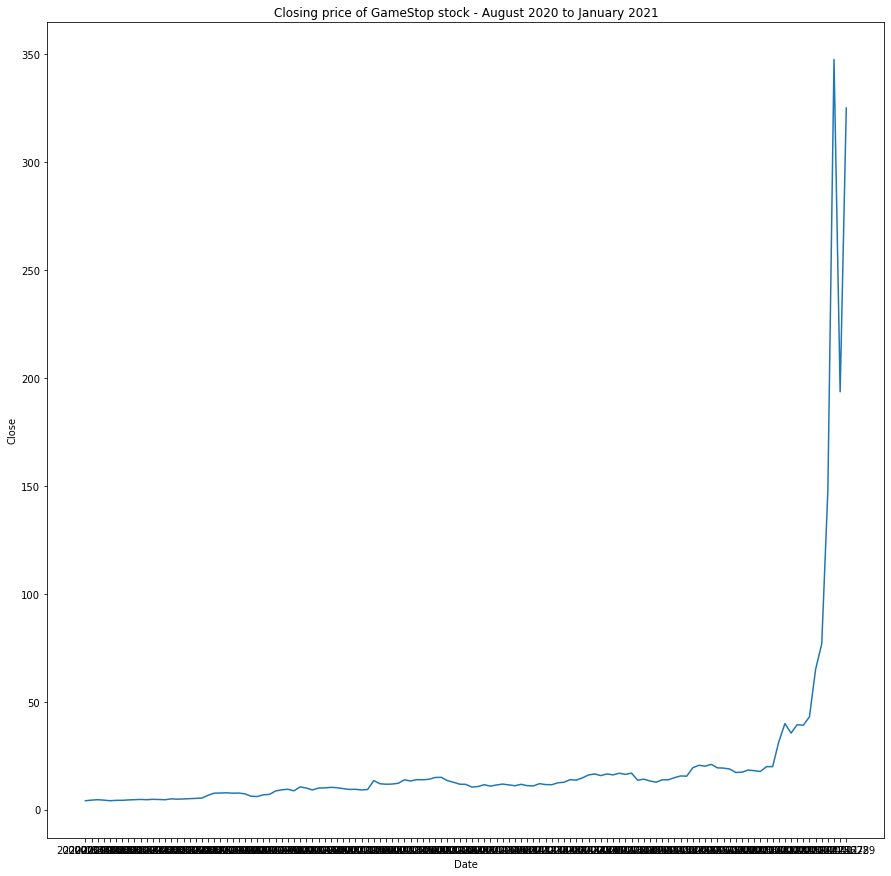

In [14]:
# plotting closing prices for stock since August 2020 

plt.figure(figsize=(15,15))
sns.lineplot(x = prices_aug_jan['Date'], y = prices_aug_jan['Close'])
plt.title('Closing price of GameStop stock - August 2020 to January 2021')

<Figure size 1800x1800 with 0 Axes>

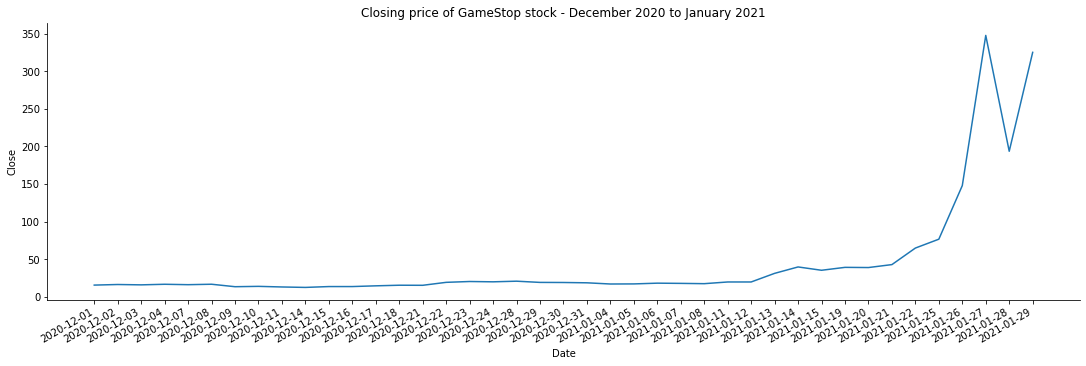

In [15]:
# plotting closing prices from December 2020 until January 2021

prices_dec_jan = prices.loc[(prices['Date'] >= '2020-12-01')]
plt.figure(figsize=(25,25))
g = sns.relplot(x="Date", y="Close", kind="line", data=prices_dec_jan, height=5,aspect=3)
plt.title('Closing price of GameStop stock - December 2020 to January 2021')
g.fig.autofmt_xdate()

In [16]:
############################ SELECTING PRICES FROM OCTOBER 01 2020  UNTIL JANUARY 29 2021

# first we copy prices dataframe, and select the timeframe to look up

price_copy = prices.copy()
price_copy = price_copy.loc[(price_copy['Date'] >= '2020-10-01')]

# then, we drop columns that we do not need: High, Low, Dividends, Stock Splits

# price_copy = price_copy.drop(['High','Low','Dividends','Stock Splits'], 1)
price_copy = price_copy[['Date','Open','Close','Volume']]
price_copy.tail()

# price_copy.shape # 83 rows and 4 columns

,Date,Open,Close,Volume
4769,2021-01-25,96.730003,76.790001,177874000
4770,2021-01-26,88.559998,147.979996,178588000
4771,2021-01-27,354.829987,347.510010,93396700
4772,2021-01-28,265.000000,193.600006,58815800
4773,2021-01-29,379.709991,325.000000,50397132


In [17]:
##############################################  CODE BOX 01
############################################## Adding labels in price data

# Now, we are going to add labels to our data, where the trend_Label will be the Close - Open > 0 as 1, u
# otherwise the difference is negative and we label it as 0, downtrend.

uptrend = 1
downtrend = 0

price_copy['Difference'] = price_copy['Close'] - price_copy['Open']
price_copy['trend_label'] = [uptrend if x > 0 else downtrend for x in price_copy['Difference']]

# we then can drop the Difference column, since we are done using it for now

price_copy = price_copy.drop(['Difference'], 1)

price_copy['Date'] = pd.to_datetime(price_copy['Date'])
price_copy.head()

,Date,Open,Close,Volume,trend_label
4691,2020-10-01,10.09,9.77,4554100,0
4692,2020-10-02,9.38,9.39,4340500,1
4693,2020-10-05,9.44,9.46,2805000,1
4694,2020-10-06,9.56,9.13,4535400,0
4695,2020-10-07,9.23,9.36,3308600,1


Text(0.5, 1.0, 'Distribution of trend labels for October 2020 - January 2021')

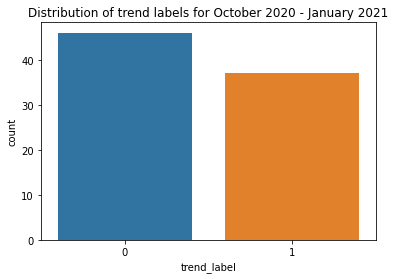

In [18]:
# checking distribution of the label column in dataset
sns.countplot(data = price_copy, x='trend_label')
plt.title("Distribution of trend labels for October 2020 - January 2021")

<Figure size 1800x1800 with 0 Axes>

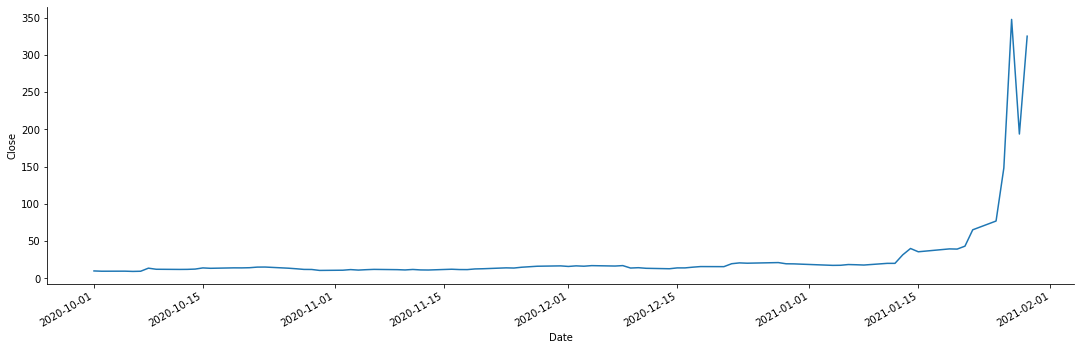

In [19]:
# Plotting price close plot from October 01 2020 until January 29 2021

plt.figure(figsize=(25,25))
g = sns.relplot(x="Date", y="Close", kind="line", data=price_copy,height=5,aspect=3)
g.fig.autofmt_xdate()

<Figure size 1800x1800 with 0 Axes>

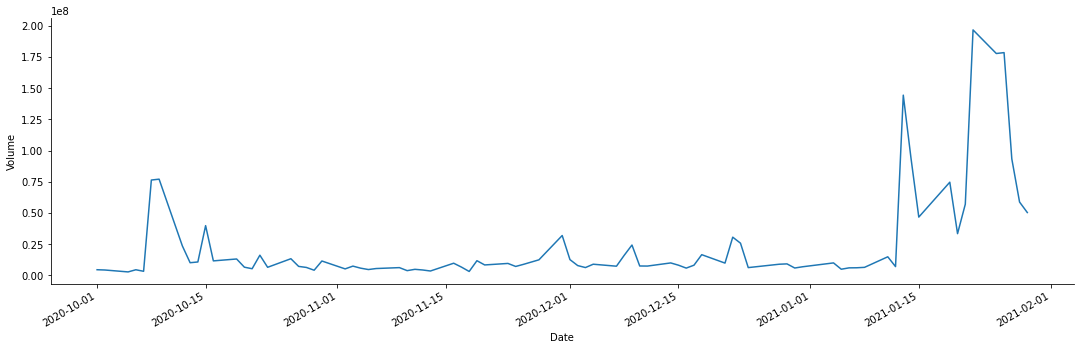

In [20]:
# plotting Volume through time, we see that when the stock was on more sportlight, the volume increased.

plt.figure(figsize=(25,25))
g = sns.relplot(x="Date", y="Volume", kind="line", data=price_copy,height=5,aspect=3)
g.fig.autofmt_xdate()

### Adding some domain knowledge - Volume
Personal knowledge, checking the volume of trading is helpful for liquidity. Trading volume is a measure of how much of a given financial asset has traded in a period of time. For stocks, volume is measured in the number of shares traded. Looking at volume patterns over time can help get a sense of the strength or conviction behind advances and declines in specific stocks and entire markets. Source(Investopedia)

We observed that during the period of January, there was an increased of trading volume compared to previous months. The increase in volume occurred when media was focusing on GME stocks and WSB subreddit. We will include volume as a feature for domain knowledge. We also can observe that for every change in prices (even for small changes), the volume of stocks increased.







## WallStreetBets reddit data
The data is from the social media subreddit WallStreetBets.

In [21]:
# changing UTC timestamp to datetime pandas format

reddit_wsb['created_utc'] = pd.to_datetime(reddit_wsb['created_utc'], unit = 's')

# sorting dataframe by date, ascending order from older to newer
reddit_wsb = reddit_wsb.sort_values(by='created_utc')
reddit_wsb.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
884062,s4jw1,Earnings season is here. Place your bets.,13,[deleted],NaN,NaN,NaN,NaN,2012-04-11 16:40:40,https://www.reddit.com/r/wallstreetbets/commen...,22,False
884061,s6r57,"GOOG - beat estimates, price barely rises.",2,[deleted],NaN,NaN,NaN,NaN,2012-04-12 20:37:31,https://www.reddit.com/r/wallstreetbets/commen...,0,False
884060,sd5ai,My poorly timed opening position for AAPL earn...,12,[deleted],NaN,NaN,NaN,NaN,2012-04-16 22:29:37,https://www.reddit.com/r/wallstreetbets/commen...,21,False
884059,se66f,Anyone betting on VVUS and their potential app...,1,[deleted],NaN,NaN,NaN,NaN,2012-04-17 13:41:30,https://www.reddit.com/r/wallstreetbets/commen...,0,False
884058,shtex,"EBAY posts higher 1Q net income and revenue, s...",7,secondhandsondek,NaN,NaN,NaN,NaN,2012-04-19 14:10:20,https://www.reddit.com/r/wallstreetbets/commen...,4,False


In [22]:
# since we are looking into what happened during the last months of 2020 and beginning of 2021
# lets look at the price closing since August of 2020, to understand the jump in price better

reddit_wsb_aug_jan = reddit_wsb.loc[(reddit_wsb['created_utc'] >= '2020-08-01')]

reddit_wsb_aug_jan.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
450256,i1ihdf,It’s the little things in life,1,2Mango2Tango,bingo bango bongo,reddit,0.0,[],2020-08-01 00:00:22,https://www.reddit.com/r/wallstreetbets/commen...,1,False
450255,i1ihe3,WSBVoteBot Log for Aug 01 2020,1,WSBVoteBot,Robot Janitor,NaN,0.0,[],2020-08-01 00:00:23,https://www.reddit.com/r/wallstreetbets/commen...,15,False
450254,i1iifn,That’s it for me folks. #RIP,1,ReedFoley,NaN,reddit,0.0,[],2020-08-01 00:02:12,https://www.reddit.com/r/wallstreetbets/commen...,0,False
450253,i1iiw3,King Shit 👑,1,PhantomFuck,NaN,reddit,0.0,[],2020-08-01 00:03:01,https://www.reddit.com/r/wallstreetbets/commen...,0,False
450252,i1ijgb,1-2k for starting budget,1,Kingmurat19,NaN,NaN,0.0,[],2020-08-01 00:04:03,https://www.reddit.com/r/wallstreetbets/commen...,19,False


# Subreddit posts - after Sentiment Analysis 

In [23]:
###########################   WallStreetBets posts with sentiment

reddit_data_sa_filepath = "./reddit_data_sa_with_weights.csv"
reddit_data_sa = pd.read_csv(reddit_data_sa_filepath)
reddit_data_sa.dropna(inplace=True)
reddit_data_sa.shape

(682642, 10)

In [24]:
##########################  label was not giving negative sentiment. Now, it has been fixed.

reddit_data_sa.loc[reddit_data_sa['compound'] > 0.10, 'label'] = 1
reddit_data_sa.loc[reddit_data_sa['compound'] < -0.10, 'label'] = -1
reddit_data_sa.describe()

,Unnamed: 0,score,total_awards_received,created_utc,num_comments,compound,label,weighted_label
count,682642.000000,682642.000000,682642.000000,6.826420e+05,682642.000000,682642.000000,682642.000000,682642.000000
mean,341357.527698,9.449928,0.010798,1.600423e+09,36.514048,0.029083,0.060406,0.101636
std,197129.718430,273.771058,0.824299,1.451443e+07,918.035442,0.323604,0.661626,4.964840
min,0.000000,0.000000,0.000000,1.533878e+09,0.000000,-0.999700,-1.000000,-174.524337
25%,170661.250000,1.000000,0.000000,1.588603e+09,0.000000,0.000000,0.000000,0.000000
50%,341321.500000,1.000000,0.000000,1.609946e+09,0.000000,0.000000,0.000000,0.000000
75%,511981.750000,1.000000,0.000000,1.611861e+09,3.000000,0.102700,1.000000,0.000000
max,740328.000000,55907.000000,334.000000,1.612084e+09,150334.000000,0.999900,1.000000,197.779369


In [25]:
# changing UTC timestamp to datetime pandas format

reddit_data_sa['created_utc'] = pd.to_datetime(reddit_data_sa['created_utc'], unit = 's')

reddit_data_sa['created_utc'] = reddit_data_sa['created_utc'].dt.floor('D')

# sorting dataframe by date, ascending order from older to newer

reddit_data_sa = reddit_data_sa.sort_values(by='created_utc', ascending = False)
reddit_data_sa.head()

,Unnamed: 0,id,title,score,total_awards_received,created_utc,num_comments,compound,label,weighted_label
0,0,l98rqo,Are you guys idiots? The sub has been brigaded...,1,0.0,2021-01-31,0,0.0000,0,0.0
8305,8305,l91zvj,Jr. is on your side!,1,0.0,2021-01-31,0,0.0000,0,0.0
8283,8283,l920ab,Doge coin next or what??,1,0.0,2021-01-31,0,0.0000,0,0.0
8284,8284,l9209v,Found this fun little tool,1,0.0,2021-01-31,0,0.5106,1,0.0
8285,8285,l9208z,Help With Stocks,1,0.0,2021-01-31,1,0.4019,1,1.0


In [26]:
# lets make a copy of this dataframe, and select the time frame we want for now

# first, start dataset from October 01, 2020

reddit_sa_copy = reddit_data_sa.copy()
reddit_sa_copy = reddit_sa_copy.loc[(reddit_sa_copy['created_utc'] >= '2020-10-01')]

# next, we want data until January 29, 2021

reddit_sa_copy = reddit_sa_copy.loc[(reddit_sa_copy['created_utc'] < '2021-01-30')]
reddit_sa_copy.describe()

,Unnamed: 0,score,total_awards_received,num_comments,compound,label,weighted_label
count,351386.000000,351386.000000,351386.000000,351386.000000,351386.000000,351386.000000,351386.000000
mean,229942.500000,3.157513,0.014309,23.272111,0.029261,0.059795,0.087090
std,101436.545182,126.439170,1.106645,867.892282,0.323790,0.659761,3.407698
min,54250.000000,0.000000,0.000000,0.000000,-0.996700,-1.000000,-174.524337
25%,142096.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,229942.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,317788.750000,1.000000,0.000000,2.000000,0.077200,0.000000,0.000000
max,405635.000000,32863.000000,334.000000,150334.000000,0.999900,1.000000,197.779369


In [27]:
reddit_sa_copy = reddit_sa_copy.sort_values(by='created_utc', ascending = True)
reddit_sa_copy.head()

,Unnamed: 0,id,title,score,total_awards_received,created_utc,num_comments,compound,label,weighted_label
405275,405276,j3f728,DKNG gain. Going to let it expire,1,0.0,2020-10-01,0,0.5267,1,0.0
405571,405572,j31cpa,So who’s actually making money? I have puts.,1,0.0,2020-10-01,0,0.0000,0,0.0
405604,405605,j2zhn2,"13F cloning, a viable strategy?",1,0.0,2020-10-01,0,0.0000,0,0.0
405634,405635,j2xqyk,WSBVoteBot Log for Oct 01 2020,1,0.0,2020-10-01,19,0.0000,0,0.0
405633,405634,j2xr0a,Investing strategy with Berkshire Hathaway,1,0.0,2020-10-01,0,0.0000,0,0.0


### 1) Modeling the data


In [28]:
##################################  SELECTING ONLY THE DATA WE WANT FOR MODEL 1

reddit_sa_copy_model_one = reddit_sa_copy[['created_utc','label','num_comments','total_awards_received','score','weighted_label']]
reddit_sa_copy_model_one.head()

,created_utc,label,num_comments,total_awards_received,score,weighted_label
405275,2020-10-01,1,0,0.0,1,0.0
405571,2020-10-01,0,0,0.0,1,0.0
405604,2020-10-01,0,0,0.0,1,0.0
405634,2020-10-01,0,19,0.0,1,0.0
405633,2020-10-01,0,0,0.0,1,0.0


          Date  n_label_negative  n_label_neutral  n_label_positive  \
0   2020-10-01             115.0            286.0             125.0   
1   2020-10-02             170.0            488.0             218.0   
2   2020-10-03              62.0            199.0              77.0   
3   2020-10-04              53.0            169.0              60.0   
4   2020-10-05             111.0            294.0             123.0   
..         ...               ...              ...               ...   
116 2021-01-25            1786.0           6381.0            2497.0   
117 2021-01-26            1041.0           3766.0            1619.0   
118 2021-01-27            6637.0          17132.0            8482.0   
119 2021-01-28           25889.0          67489.0           27591.0   
120 2021-01-29           14928.0          48948.0           20878.0   

     num_comments  total_awards_received     score  weighted_label  \
0       97.802281               0.019011  1.825095       -0.166972   
1      

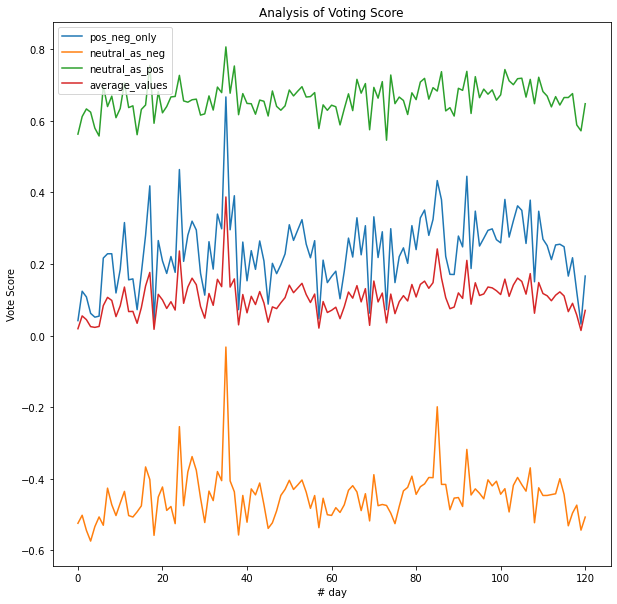

In [29]:
##############################################  CODE BOX 02
#################################  function to count labels for each day
def count_labels_in_df(df):
    # find unique labels
    unique_labels = np.array([-1,0,1])#df['label'].unique()
    label_count = np.zeros(shape=unique_labels.shape)

    # count how much we have for each label
    for i in range(unique_labels.shape[0]):
        unique_label = unique_labels[i]
        df_with_desired_label = df[df['label'] == unique_label]
        label_count[i] = df_with_desired_label.shape[0]
        
    # return labels and count
    return unique_labels, label_count
        
# get label count for each day
unique_days = reddit_sa_copy_model_one['created_utc'].unique()
results_dict = {
    'Date': [],
    'n_label_negative' : [],
    'n_label_neutral' : [],
    'n_label_positive' : [],
    'num_comments' : [],
    'total_awards_received' : [],
    'score' : [],
    'weighted_label': []
}

# run a for loop to check per day, how many positive, neutral and negative values are, 
# and save it in a dictionary, the day and 3 count values

for j in range(unique_days.shape[0]):
    # find count per day
    df_for_each_day = reddit_sa_copy_model_one[reddit_sa_copy_model_one['created_utc'] == unique_days[j]]
    unique_labels, label_count = count_labels_in_df(df_for_each_day)
        
    # aggregate other metrics AVERAGE
    num_comments = df_for_each_day['num_comments'].mean()
    total_awards_received = df_for_each_day['total_awards_received'].mean()
    score = df_for_each_day['score'].mean()
    weighted_label = df_for_each_day['weighted_label'].mean()
    
#     # aggregate other metrics MIXED SUM AND AVERAGE
#     num_comments = df_for_each_day['num_comments'].sum()
#     total_awards_received = df_for_each_day['total_awards_received'].mean()
#     score = df_for_each_day['score'].mean()
    
    # save results in dict, per day
    results_dict['Date'].append(unique_days[j])
    results_dict['n_label_negative'].append(label_count[0])
    results_dict['n_label_neutral'].append(label_count[1])
    results_dict['n_label_positive'].append(label_count[2])    
    results_dict['num_comments'].append(num_comments)
    results_dict['total_awards_received'].append(total_awards_received)
    results_dict['score'].append(score)
    results_dict['weighted_label'].append(weighted_label)
    
    
# convert results dict in dataframe
results_df = pd.DataFrame.from_dict(results_dict)

###############################   couple ways of obtaining sentiment per day
# ignoring neutral
results_df['vote_score1'] = (results_df['n_label_negative']*-1 + results_df['n_label_positive']*1)/(results_df['n_label_negative']+results_df['n_label_positive'])
# neutral sentiment as negative value 
results_df['vote_score2'] = (results_df['n_label_negative']*-1 + results_df['n_label_neutral']*-1 + results_df['n_label_positive']*1)/(results_df['n_label_negative']+results_df['n_label_neutral']+results_df['n_label_positive'])
# neutral sentiment as positive value 
results_df['vote_score3'] = (results_df['n_label_negative']*-1 + results_df['n_label_neutral']*1 + results_df['n_label_positive']*1)/(results_df['n_label_negative']+results_df['n_label_neutral']+results_df['n_label_positive'])
# neutral sentiment as neutral value, zero value ------ sentiment as a average per day
results_df['vote_average'] = (results_df['n_label_negative']*-1 + results_df['n_label_neutral']*0 + results_df['n_label_positive']*1)/(results_df['n_label_negative']+results_df['n_label_neutral']+results_df['n_label_positive'])

print(results_df)

# visualization of the different ways to get sentiment 
plt.figure(figsize=[10,10])
plt.title('Analysis of Voting Score')
plt.plot(results_df['vote_score1'], label='pos_neg_only')
plt.plot(results_df['vote_score2'], label='neutral_as_neg')
plt.plot(results_df['vote_score3'], label='neutral_as_pos')
plt.plot(results_df['vote_average'], label='average_values')
plt.ylabel('Vote Score')
plt.xlabel('# day')
plt.legend()
plt.show()

- Seeing the plot above, we decided to get the sentiment per day as using average values,not ignoring the neutral sentiment

In [30]:
# ##############################################  CODE BOX 03

# ################################# Selecting unique samples per day and calculate average score in that sample

# import numpy as np

# #################################  function to count labels for each day in a day sample
# def count_labels_in_df_sample(df, percentage):
#     # sampling only x percentage of data per day
#     count = len(df)
#     samplingSize = int(count * percentage/100)  
#     rand_idx = np.random.randint(0, count, samplingSize)
#     df = df.iloc[rand_idx]            
            
#     # find unique labels
#     unique_labels = np.array([-1,0,1])#df['label'].unique()
#     label_count = np.zeros(shape=unique_labels.shape)
    
#     # count how much we have for each label
#     for i in range(unique_labels.shape[0]):
#         unique_label = unique_labels[i]
#         df_with_desired_label = df[df['label'] == unique_label]
#         label_count[i] = df_with_desired_label.shape[0]
        
#     # return labels and count
#     return unique_labels, label_count
        
# # get label count for each day
# unique_days = reddit_sa_copy_model_one['created_utc'].unique()
# sampleScores = {
#     'Date': [],
#     'n_label_negative' : [],
#     'n_label_neutral' : [],
#     'n_label_positive' : [],
#     'num_comments' : [],
#     'total_awards_received' : [],
#     'score' : [],
# }

# # run a for loop to check per day, how many positive, neutral and negative values are, 
# # and save it in a dictionary, the day and 3 count values

# for j in range(unique_days.shape[0]):
#     # find count per day
#     df_for_each_day_sample = reddit_sa_copy_model_one[reddit_sa_copy_model_one['created_utc'] == unique_days[j]]
#     unique_labels, label_count = count_labels_in_df_sample(df_for_each_day_sample, 15)
        
#     # aggregate other metrics AVERAGE
#     num_comments = df_for_each_day_sample['num_comments'].mean()
#     total_awards_received = df_for_each_day_sample['total_awards_received'].mean()
#     score = df_for_each_day_sample['score'].mean()

#     # save results in dict, per day
#     sampleScores['Date'].append(unique_days[j])
#     sampleScores['n_label_negative'].append(label_count[0])
#     sampleScores['n_label_neutral'].append(label_count[1])
#     sampleScores['n_label_positive'].append(label_count[2])    
#     sampleScores['num_comments'].append(num_comments)
#     sampleScores['total_awards_received'].append(total_awards_received)
#     sampleScores['score'].append(score)
    
# # convert results dict in dataframe
# sampleScores = pd.DataFrame.from_dict(sampleScores)

# ###############################   couple ways of obtaining sentiment per day
# # neutral sentiment as neutral value, zero value ------ sentiment as a average per day

# sampleScores['vote_average'] = (sampleScores['n_label_negative']*-1 + sampleScores['n_label_neutral']*0 + sampleScores['n_label_positive']*1)/(sampleScores['n_label_negative']+sampleScores['n_label_neutral']+sampleScores['n_label_positive'])

# print(sampleScores)


In [31]:
##################### feature one of our model - sentiment scores per day - taking average scores

# model with sentiment
results_sa_one = results_df[['Date','weighted_label']]

# model with sentiment and volume traded
results_sa_two = results_df[['Date','weighted_label']]

# model with sentiment and comments, and also then add volume of stocks traded
results_sa_three = results_df[['Date','weighted_label', 'num_comments']]

# MODEL WITH ALL SENTIMENT FEATURES
results_sa_six = results_df[['Date','weighted_label','num_comments', 'total_awards_received','score']]

# for model one and three
price_copy_model_one = price_copy[['Date','trend_label']]

# adding Volume as feature, for model two and four

price_copy_model_two = price_copy[['Date','Volume','trend_label']]
price_copy_model_two.iloc[0,0]

Timestamp('2020-10-01 00:00:00')

In [71]:
############################ model one: feature ---- 'vote_average'

# merge the price and sentiment dataset for that period October 2020 to January 2021
model_one = pd.merge(results_sa_one, price_copy_model_one, on=['Date'], how='inner')
model_one.head()

,Date,weighted_label,trend_label
0,2020-10-01,-0.166972,0
1,2020-10-02,-0.035421,1
2,2020-10-05,0.051315,1
3,2020-10-06,-0.030504,0
4,2020-10-07,0.029728,1


In [72]:
############################  model two: feature ---- 'vote_average', 'Volume'

# merge the price and sentiment dataset for that period October 2020 to January 2021

model_two = pd.merge(results_sa_two, price_copy_model_two, on=['Date'], how='inner')
model_two.head()

,Date,weighted_label,Volume,trend_label
0,2020-10-01,-0.166972,4554100,0
1,2020-10-02,-0.035421,4340500,1
2,2020-10-05,0.051315,2805000,1
3,2020-10-06,-0.030504,4535400,0
4,2020-10-07,0.029728,3308600,1


In [73]:
############################  model three: feature ---- 'vote_average', 'n_comments',

# merge the price and sentiment dataset for that period October 2020 to January 2021
 
model_three = pd.merge(results_sa_three, price_copy_model_one, on=['Date'], how='inner')
model_three.head()

,Date,weighted_label,num_comments,trend_label
0,2020-10-01,-0.166972,97.802281,0
1,2020-10-02,-0.035421,79.386986,1
2,2020-10-05,0.051315,73.920455,1
3,2020-10-06,-0.030504,71.800253,0
4,2020-10-07,0.029728,66.991354,1


In [74]:
############################  model four: feature ---- 'vote_average', 'num_comments','Volume'

# merge the price and sentiment dataset for that period October 2020 to January 2021

model_four = pd.merge(results_sa_three, price_copy_model_two, on=['Date'], how='inner')
model_four.head()

,Date,weighted_label,num_comments,Volume,trend_label
0,2020-10-01,-0.166972,97.802281,4554100,0
1,2020-10-02,-0.035421,79.386986,4340500,1
2,2020-10-05,0.051315,73.920455,2805000,1
3,2020-10-06,-0.030504,71.800253,4535400,0
4,2020-10-07,0.029728,66.991354,3308600,1


In [75]:
############################  model six pure sentiment: 
##                      feature ----     'Date','vote_average','num_comments', 'total_awards_received','score'

# merge the price and sentiment dataset for that period October 2020 to January 2021

model_six = pd.merge(results_sa_six, price_copy_model_one, on=['Date'], how='inner')
model_six.head()

,Date,weighted_label,num_comments,total_awards_received,score,trend_label
0,2020-10-01,-0.166972,97.802281,0.019011,1.825095,0
1,2020-10-02,-0.035421,79.386986,0.000000,1.003425,1
2,2020-10-05,0.051315,73.920455,0.000000,1.003788,1
3,2020-10-06,-0.030504,71.800253,0.000000,1.063211,0
4,2020-10-07,0.029728,66.991354,0.000000,1.001441,1


### Adding some domain knowledge - The S&P 500 Market Index

The Standard and Poor's 500,or simply the S&P 500,is a weighted measurement stock market index of the 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices. Source (Wikipedia, 2021)

When it comes to the major U.S. stock indexes, the S&P 500 index is regarded as a barometer of the overall stock market’s performance and an indicator of how large corporations are performing. It is considered the best indicator of how U.S. stocks are performing overall. Source(The Motley Fool)

We will be adding the daily trend of S&P 500 index price, because we believe acknowledging the overall trend of the market is helpful for trading, since you should not expect a updward trend day if the general market trend is downward. Usually the market responds as a whole, as for example last week, the market was downtrending after news of Biden tax plan (April 25, 2021).


In [76]:
sp_path = './S&P_ US_SPX.csv'
sp_data = pd.read_csv(sp_path)
sp_data.head()

,Date,Open,High,Low,Close
0,01/29/2021,"3,778.05","3,778.05","3,694.12","3,714.24"
1,01/28/2021,"3,755.75","3,830.50","3,755.75","3,787.38"
2,01/27/2021,"3,836.83","3,836.83","3,732.48","3,750.77"
3,01/26/2021,"3,862.96","3,870.90","3,847.78","3,849.62"
4,01/25/2021,"3,851.68","3,859.23","3,797.16","3,855.36"


In [77]:
sp_data['Date'] = pd.to_datetime(sp_data['Date'])
sp_data = sp_data.sort_values(by='Date', ascending = True)

sp_data['Close'] = sp_data['Close'].str.replace(',', '')
sp_data['Open'] = sp_data['Open'].str.replace(',', '')
sp_data['Close'] = pd.to_numeric(sp_data['Close'])
sp_data['Open'] = pd.to_numeric(sp_data['Open'])

# dija_data.head()

sp_data['Close'].isna().sum()


0

In [78]:
sp_data['Open'].isna().sum()

0

In [79]:
uptrend = 1
downtrend = 0 
sp_data['Difference'] = sp_data['Close'] - sp_data['Open']
sp_data['trend_s&p'] = [uptrend if x > 0 else downtrend for x in sp_data['Difference']]


In [80]:
sp_data = sp_data.drop(['Difference'], 1)

sp_data.head()

,Date,Open,High,Low,Close,trend_s&p
82,2020-10-01,3385.87,"3,397.18","3,361.39",3380.80,0
81,2020-10-02,3338.94,"3,369.10","3,323.69",3348.44,1
80,2020-10-05,3367.27,"3,409.57","3,367.27",3408.63,1
79,2020-10-06,3408.74,"3,431.56","3,354.54",3360.95,0
78,2020-10-07,3384.56,"3,426.26","3,384.56",3419.45,1


In [81]:
sp_data = sp_data[['Date','trend_s&p']]
sp_data.shape

(83, 2)

In [82]:
############################  model five: feature ---- 'vote_average', 'num_comments','Volume', 'trend_s&p'

# merge the model four with s&p dataset for that period October 2020 to January 2021

model_five = pd.merge(model_four, sp_data, on=['Date'], how='inner')
model_five.head()

,Date,weighted_label,num_comments,Volume,trend_label,trend_s&p
0,2020-10-01,-0.166972,97.802281,4554100,0,0
1,2020-10-02,-0.035421,79.386986,4340500,1,1
2,2020-10-05,0.051315,73.920455,2805000,1,1
3,2020-10-06,-0.030504,71.800253,4535400,0,0
4,2020-10-07,0.029728,66.991354,3308600,1,1


In [83]:
############################  MODEL SEVEN sentiment, other features reddit post + S&P index trend + Volume : 
##    features -- 'Date','vote_average','num_comments', 'total_awards_received','score','trend_s&p','Volume'

model_seven_0 = pd.merge(results_sa_six, price_copy_model_two, on=['Date'], how='inner')
model_seven = pd.merge(model_seven_0, sp_data, on=['Date'], how='inner')
model_seven.head()


,Date,weighted_label,num_comments,total_awards_received,score,Volume,trend_label,trend_s&p
0,2020-10-01,-0.166972,97.802281,0.019011,1.825095,4554100,0,0
1,2020-10-02,-0.035421,79.386986,0.000000,1.003425,4340500,1,1
2,2020-10-05,0.051315,73.920455,0.000000,1.003788,2805000,1,1
3,2020-10-06,-0.030504,71.800253,0.000000,1.063211,4535400,0,0
4,2020-10-07,0.029728,66.991354,0.000000,1.001441,3308600,1,1


### Adding domain knowledge - Relative Strength Index

Relative Strength Index, or RSI, is a momentum indicator that measures the magnitude of recent price changes to evaluate if a stock price or asset is overbought or oversold. The oscilation can go from 0 to 100, and it can provide a technical signal about bullish or bearish prices of a stock.

To add this indicator, we will be adding an Technical Analysis library that is built on Pandas and Numpy. Soource (https://github.com/bukosabino/ta#readme).

In [84]:
!pip install ta

In [85]:
from ta import add_all_ta_features

price_copy_whole = prices.copy()

price_copy_whole = price_copy_whole[['Date','High','Low','Open','Close','Volume']]

uptrend = 1
downtrend = 0

price_copy_whole['Difference'] = price_copy_whole['Close'] - price_copy_whole['Open']
price_copy_whole['trend_label'] = [uptrend if x > 0 else downtrend for x in price_copy_whole['Difference']]

# we then can drop the Difference column, since we are done using it for now

price_copy_whole = price_copy_whole.drop(['Difference'], 1)

price_copy_whole['Date'] = pd.to_datetime(price_copy_whole['Date'])
# price_copy_indicator.head()

price_copy_indicators = add_all_ta_features(
    price_copy_whole, open="Open", high="High", low="Low", close="Close", volume="Volume")


In [86]:
# selecting only the period we want, with indicator

price_copy_indicators = price_copy_indicators.copy()
price_copy_indicators = price_copy_indicators.loc[(price_copy_indicators['Date'] >= '2020-10-01')]

# # # selecting necessary features to visualize
price_copy_indicators = price_copy_indicators[['Date', 'High', 'Low', 'Open', 'Close', 'Volume','momentum_rsi','trend_label']]
price_copy_indicators.tail()


,Date,High,Low,Open,Close,Volume,momentum_rsi,trend_label
4769,2021-01-25,159.179993,61.130001,96.730003,76.790001,177874000,90.569446,0
4770,2021-01-26,150.000000,80.199997,88.559998,147.979996,178588000,95.842015,1
4771,2021-01-27,380.000000,249.000000,354.829987,347.510010,93396700,98.452877,0
4772,2021-01-28,483.000000,112.250000,265.000000,193.600006,58815800,64.703179,0
4773,2021-01-29,413.980011,250.000000,379.709991,325.000000,50397132,73.161926,0


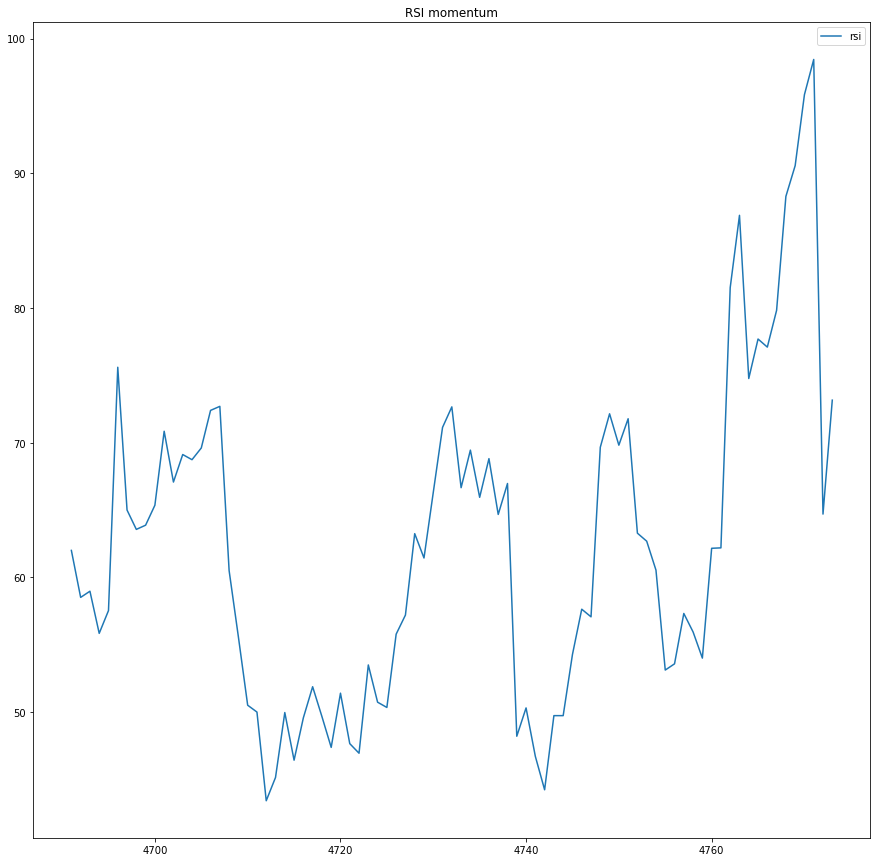

In [87]:
plt.figure(figsize=[15,15])
plt.plot(price_copy_indicators['momentum_rsi'], label='rsi')
plt.title('RSI momentum')
plt.legend()
plt.show()

In [88]:
############################################### MODEL 8
price_copy_indicators = price_copy_indicators[['Date','Volume','momentum_rsi','trend_label']]

# price_copy_indicators
model_eight_0 = pd.merge(results_sa_six, price_copy_indicators, on=['Date'], how='inner')
model_eight = pd.merge(model_eight_0, sp_data, on=['Date'], how='inner')

model_eight.head(10)

,Date,weighted_label,num_comments,total_awards_received,score,Volume,momentum_rsi,trend_label,trend_s&p
0,2020-10-01,-0.166972,97.802281,0.019011,1.825095,4554100,62.007270,0,0
1,2020-10-02,-0.035421,79.386986,0.000000,1.003425,4340500,58.520212,1,1
2,2020-10-05,0.051315,73.920455,0.000000,1.003788,2805000,58.977861,1,1
3,2020-10-06,-0.030504,71.800253,0.000000,1.063211,4535400,55.849498,0,0
4,2020-10-07,0.029728,66.991354,0.000000,1.001441,3308600,57.539964,1,1
5,2020-10-08,0.146863,65.703170,0.000000,1.004323,76453600,75.603574,1,1
6,2020-10-09,0.182147,84.181672,0.000000,1.004823,77152800,65.003420,0,1
7,2020-10-12,0.217229,74.122349,0.000000,1.000000,23655700,63.566965,1,1
8,2020-10-13,0.067569,77.824841,0.000000,1.007962,10179700,63.879544,1,0
9,2020-10-14,0.200936,68.945559,0.000000,1.000000,10776800,65.359817,0,0


### 2) Correlation between features and price trend 


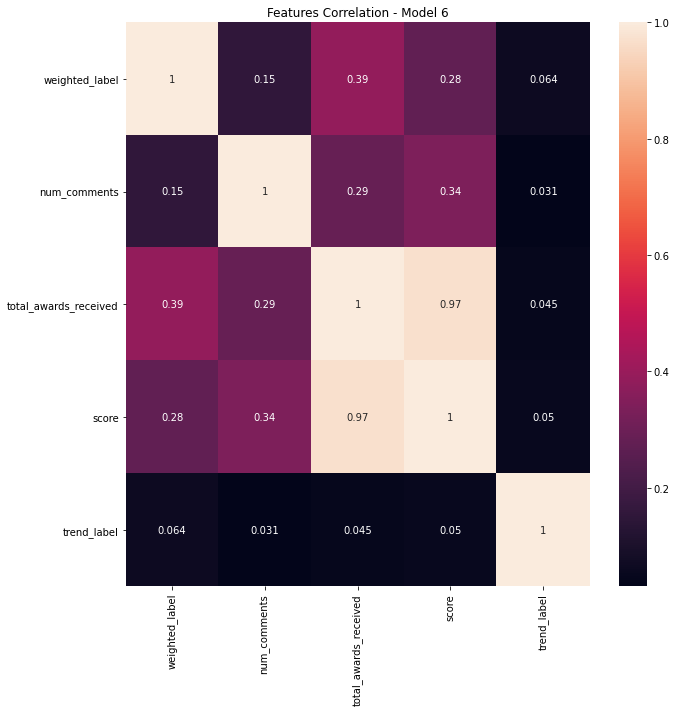

In [89]:
### only using sentiment information and subreddit posts information

plt.figure(figsize=(10,10))
sns.heatmap(model_six.corr(), annot=True)
plt.title('Features Correlation - Model 6')
plt.tight_layout()
plt.show()

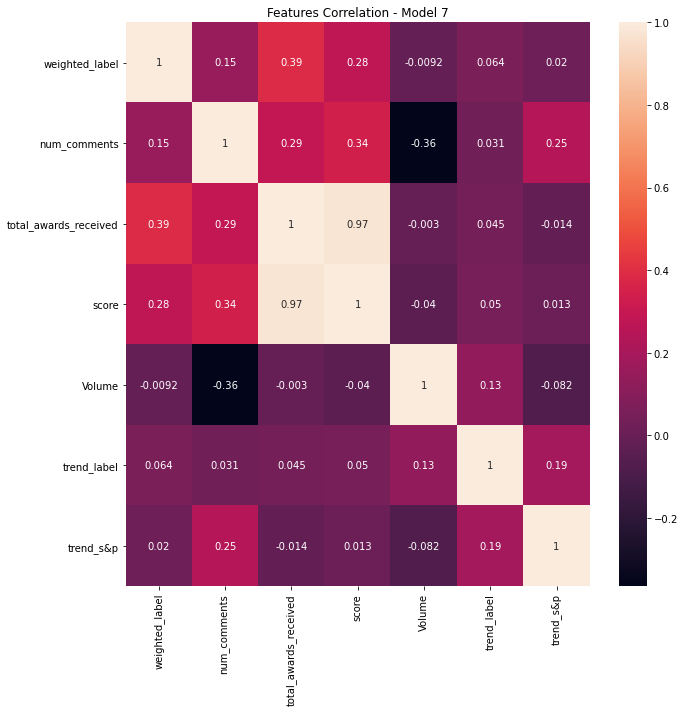

In [90]:
# using subreddit posts sentiment and features, GME volume traded, and S&P market index trend

plt.figure(figsize=(10,10))
sns.heatmap(model_seven.corr(), annot=True)
plt.title('Features Correlation - Model 7')
plt.tight_layout()
plt.show()

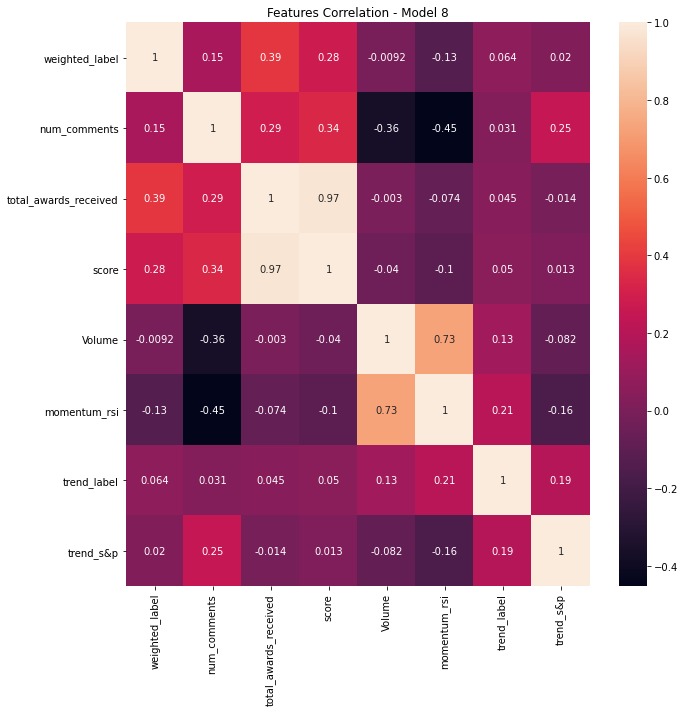

In [91]:
### only using information from REDDIT posts(all features), S&P market index trend, GME Volume traded, RSI value

plt.figure(figsize=(10,10))
sns.heatmap(model_eight.corr(), annot=True)
plt.title('Features Correlation - Model 8')
plt.tight_layout()
plt.show()

### 3) MODELS
 We want to see if using the models below, we could forecast the trend of the day, using same day variables.
 - Model 6: use information from the reddit dataset posts
 - Model 7: use information fromreddit dataset posts, Volume of stocks traded, and S&P index trend
 - Model 8: use information fromreddit dataset posts, Volume of stocks traded, S&P index trend, and RSI

Dividing our models into training data, evaluation data and test data

In [92]:
#Holds out-of-bag-error 
results_1 = np.zeros(19)
results_2 = np.zeros(19)
results_3 = np.zeros(19)
results_4 = np.zeros(19)
results_5 = np.zeros(19)

In [93]:
def train_test_split(data):
    
    train = data.sample(n=int(data.shape[0]*.90))
    test = data.merge(train, how='left', indicator=True)
    test = test[test['_merge'] == 'left_only']
    test.drop(columns=['_merge'], inplace=True)
    return (train,test)

In [94]:
for i in range(1,10):
    model_one_train,model_one_test = train_test_split(model_one)
    
    # splitting between features and labels
    model_one_features_train = model_one_train[['weighted_label']]
    model_one_features_test = model_one_test[['weighted_label']]

    model_one_labels_train = model_one_train[['trend_label']]
    model_one_labels_test = model_one_test[['trend_label']]
    for n in range(5,100,5):
        model = RandomForestClassifier(n_estimators = n, criterion = "entropy",oob_score=True, max_features=1, max_samples = int(0.75*model_one_features_train.shape[0]))
        model.fit(model_one_features_train, model_one_labels_train)
        results_1[int((n/5)-1)] = results_1[int((n/5)-1)] + 1/i * (model.oob_score_ - results_1[int((n/5)-1)] )

In [95]:
model_two = model_two.merge(results_df[['Date','score']], on='Date')
for i in range(1,10):
    model_two_train,model_two_test = train_test_split(model_two)
    #model_two_test = model_two.iloc[(int(rows*0.8)+int(rows*0.1)):]

    # splitting between features and labels
    model_two_features_train = model_two_train[['weighted_label','score']]
    model_two_features_test = model_two_test[['weighted_label','score']]

    model_two_labels_train = model_two_train[['trend_label']]
    model_two_labels_test = model_two_test[['trend_label']]
    for n in range(5,100,5):
        model = RandomForestClassifier(n_estimators = n, criterion = "entropy",oob_score=True, max_features=1, max_samples = int(0.75*model_one_features_train.shape[0]))
        model.fit(model_two_features_train, model_two_labels_train)
        results_2[int((n/5)-1)] = results_2[int((n/5)-1)] + 1/i * (model.oob_score_ - results_2[int((n/5)-1)] )

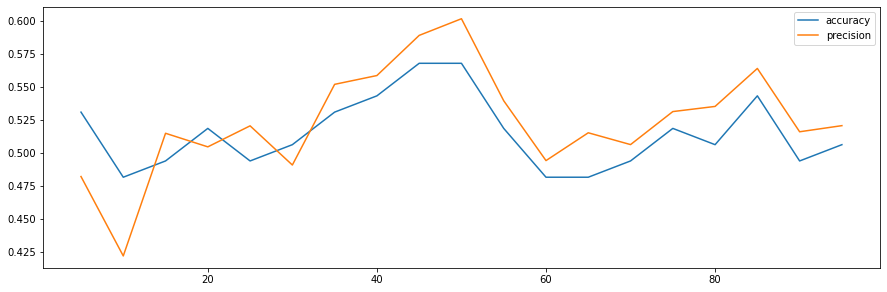

In [96]:
model_three = model_three.merge(results_df[['Date','score', 'total_awards_received']], on='Date')
acc = np.zeros(19)
precision = np.zeros(19)
for i in range(1,10):
    model_three_train,model_three_test = train_test_split(model_three)
# splitting between features and labels
    model_three_features_train = model_three_train[['weighted_label','score', 'total_awards_received']]
    #model_three_features_eval = model_three_eval[['weighted_label','score', 'total_awards_received']]
    model_three_features_test = model_three_test[['weighted_label','score', 'total_awards_received']]

    model_three_labels_train = model_three_train[['trend_label']]
    #model_three_labels_eval = model_three_eval[['trend_label']]
    model_three_labels_test = model_three_test[['trend_label']]
    for n in range(5,100,5):
        model = RandomForestClassifier(n_estimators = n, criterion = "entropy",oob_score=True, max_features=1, max_samples = int(0.75*model_one_features_train.shape[0]))
        model.fit(model_three_features_train, model_three_labels_train)
        results_3[int((n/5)-1)] = results_3[int((n/5)-1)] + 1/i * (model.oob_score_ - results_3[int((n/5)-1)] )
        acc[int((n/5)-1)] = acc[int((n/5)-1)] + 1/i * (model.score(model_three_features_test,model_three_labels_test) - acc[int((n/5)-1)] )
        precision[int((n/5)-1)] = precision[int((n/5)-1)] + 1/i * (precision_score(model_three_labels_test,model.predict(model_three_features_test), average='weighted') - precision[int((n/5)-1)])
fig, ax = plt.subplots(1,1,figsize=(15,4.8))
ax.plot([x for x in range(5,100,5)], acc, label='accuracy')
ax.plot([x for x in range(5,100,5)], precision,  label='precision')
ax.legend()
plt.show()

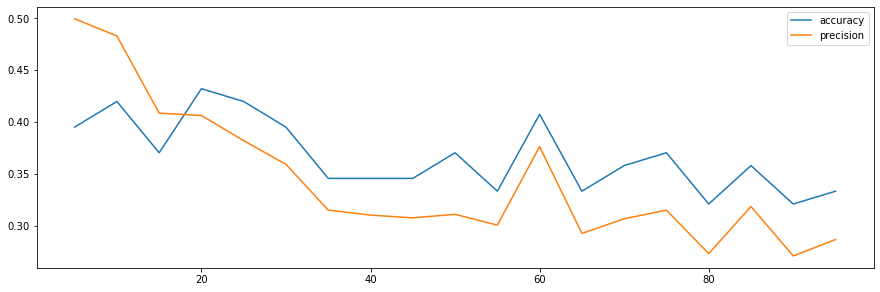

In [97]:
model_four = model_four.merge(results_df[['Date','score','total_awards_received']], on='Date')
acc = np.zeros(19)
precision = np.zeros(19)


for i in range(1,10):
        # reserve the fist 80% to train, 10% for evaluation and 10% for test
    model_four_train,model_four_test = train_test_split(model_four)

    # splitting between features and labels
    model_four_features_train = model_four_train[['weighted_label','score', 'total_awards_received', 'num_comments']]
    model_four_features_test = model_four_test[['weighted_label','score', 'total_awards_received', 'num_comments']]
    
    model_four_labels_train = model_four_train[['trend_label']]
    model_four_labels_test = model_four_test[['trend_label']]

    for n in range(5,100,5):
        model = RandomForestClassifier(n_estimators = n, criterion = "entropy",oob_score=True, max_samples = int(0.75*model_four_features_train.shape[0]))
        model.fit(model_four_features_train, model_four_labels_train)
        results_4[int((n/5)-1)] = results_4[int((n/5)-1)] + 1/i * (model.oob_score_ - results_4[int((n/5)-1)] )
        acc[int((n/5)-1)] = acc[int((n/5)-1)] + 1/i * (model.score(model_four_features_test,model_four_labels_test) - acc[int((n/5)-1)] )
        precision[int((n/5)-1)] = precision[int((n/5)-1)] + 1/i * (precision_score(model_four_labels_test,model.predict(model_four_features_test), average='weighted') - precision[int((n/5)-1)])
fig, ax = plt.subplots(1,1,figsize=(15,4.8))
ax.plot([x for x in range(5,100,5)], acc, label='accuracy')
ax.plot([x for x in range(5,100,5)], precision,  label='precision')
ax.legend()
plt.show()

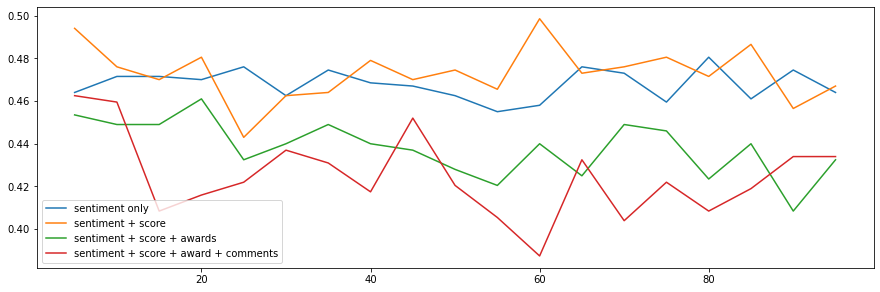

In [98]:
#plot of all out-of-bag-errors
fig, ax = plt.subplots(1,1,figsize=(15,4.8))
ax.plot([x for x in range(5,100,5)], results_1, label='sentiment only')
ax.plot([x for x in range(5,100,5)], results_2,  label='sentiment + score')
ax.plot([x for x in range(5,100,5)], results_3,  label='sentiment + score + awards')
ax.plot([x for x in range(5,100,5)], results_4,  label='sentiment + score + award + comments')
ax.legend()
plt.show()

### Best model without domain knowledge

It isn't entirely clear whether the addition of comments is helping our model. We will therefore include it as well as domain knowledge to determine which features are the most important. 

In [99]:
model_eight.head()

,Date,weighted_label,num_comments,total_awards_received,score,Volume,momentum_rsi,trend_label,trend_s&p
0,2020-10-01,-0.166972,97.802281,0.019011,1.825095,4554100,62.007270,0,0
1,2020-10-02,-0.035421,79.386986,0.000000,1.003425,4340500,58.520212,1,1
2,2020-10-05,0.051315,73.920455,0.000000,1.003788,2805000,58.977861,1,1
3,2020-10-06,-0.030504,71.800253,0.000000,1.063211,4535400,55.849498,0,0
4,2020-10-07,0.029728,66.991354,0.000000,1.001441,3308600,57.539964,1,1


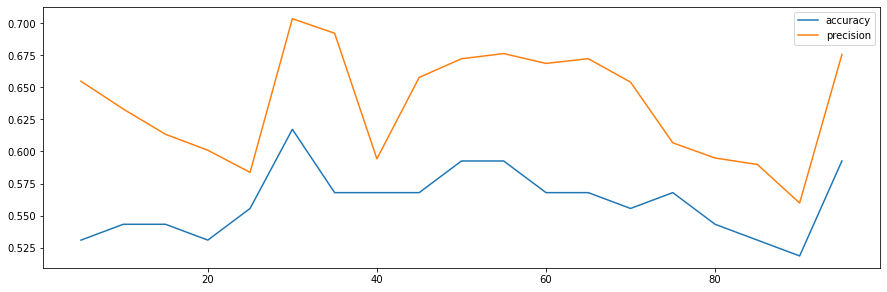

In [101]:
acc = np.zeros(19)
precision = np.zeros(19)
feature_importances = np.zeros(7)
results_8 = np.zeros(19)

for i in range(1,10):
        # reserve the fist 80% to train, 10% for evaluation and 10% for test
    # reserve the fist 80% to train, 10% for evaluation and 10% for test
    model_eight_train, model_eight_test = train_test_split(model_eight)

# splitting between features and labels
    model_eight_features_train = model_eight_train[['weighted_label','num_comments','total_awards_received','score','Volume','trend_s&p','momentum_rsi']]
    model_eight_features_test = model_eight_test[['weighted_label','num_comments','total_awards_received','score','Volume','trend_s&p','momentum_rsi']]

    model_eight_labels_train = model_eight_train[['trend_label']]
    model_eight_labels_test = model_eight_test[['trend_label']]

    for n in range(5,100,5):
        model = RandomForestClassifier(n_estimators = n, criterion = "entropy",oob_score=True, max_samples = int(0.75*model_eight_features_train.shape[0]))
        model.fit(model_eight_features_train, model_eight_labels_train)
        results_8[int((n/5)-1)] = results_8[int((n/5)-1)] + 1/i * (model.oob_score_ - results_8[int((n/5)-1)] )
        acc[int((n/5)-1)] = acc[int((n/5)-1)] + 1/i * (model.score(model_eight_features_test,model_eight_labels_test) - acc[int((n/5)-1)] )
        precision[int((n/5)-1)] = precision[int((n/5)-1)] + 1/i * (precision_score(model_eight_labels_test,model.predict(model_eight_features_test), average='weighted') - precision[int((n/5)-1)])
        feature_importances = feature_importances + 1/i * (model.feature_importances_ - feature_importances)
fig, ax = plt.subplots(1,1,figsize=(15,4.8))
ax.plot([x for x in range(5,100,5)], acc, label='accuracy')
ax.plot([x for x in range(5,100,5)], precision,  label='precision')
ax.legend()
plt.show()

No handles with labels found to put in legend.


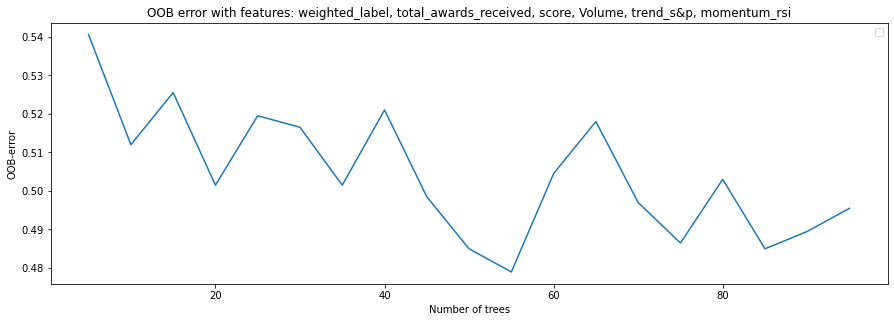

In [102]:
fig, ax = plt.subplots(1,1,figsize=(15,4.8))
ax.plot([x for x in range(5,100,5)], results_8)
ax.set_xlabel('Number of trees')
ax.set_ylabel('OOB-error')
ax.set_title('OOB error with features: weighted_label, total_awards_received, score, Volume, trend_s&p, momentum_rsi')
ax.legend()
plt.show()

No handles with labels found to put in legend.


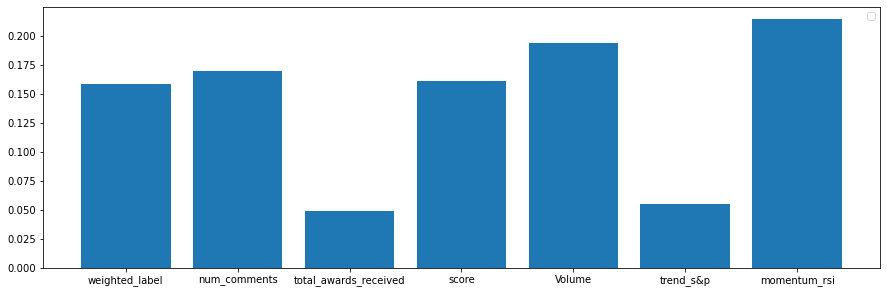

In [103]:
fig, ax = plt.subplots(1,1,figsize=(15,4.8))
ax.bar(['weighted_label','num_comments','total_awards_received','score','Volume','trend_s&p','momentum_rsi'], feature_importances )
ax.legend()
plt.show()

### Model + Domain knowledge

Domain knowledge increased our model evaluation metrics but also increased our ou-of-bag error. Based off of the feature importance, num_comments is one of the top 4 most important features. THe final model will therefore use weighted_labels, num_comments, score, volume, and momentum_rsi to predict stock trend of GME for a given day

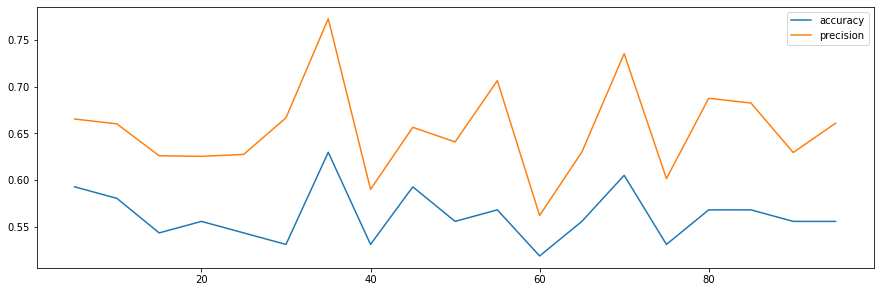

In [104]:
#final model will only use weighted label, score, volume, and momentum_rsi
acc = np.zeros(19)
precision = np.zeros(19)

results_9 = np.zeros(19)

for i in range(1,10):
        # reserve the fist 80% to train, 10% for evaluation and 10% for test
    # reserve the fist 80% to train, 10% for evaluation and 10% for test
    model_nine_train, model_nine_test = train_test_split(model_eight)

# splitting between features and labels
    model_nine_features_train = model_nine_train[['weighted_label','num_comments','score','Volume','momentum_rsi']]
    model_nine_features_test = model_nine_test[['weighted_label','num_comments','score','Volume','momentum_rsi']]

    model_nine_labels_train = model_nine_train[['trend_label']]
    model_nine_labels_test = model_nine_test[['trend_label']]

    for n in range(5,100,5):
        model = RandomForestClassifier(n_estimators = n, criterion = "entropy",oob_score=True, max_samples = int(0.75*model_nine_features_train.shape[0]))
        model.fit(model_nine_features_train, model_nine_labels_train)
        results_9[int((n/5)-1)] = results_9[int((n/5)-1)] + 1/i * (model.oob_score_ - results_9[int((n/5)-1)] )
        acc[int((n/5)-1)] = acc[int((n/5)-1)] + 1/i * (model.score(model_nine_features_test,model_nine_labels_test) - acc[int((n/5)-1)] )
        precision[int((n/5)-1)] = precision[int((n/5)-1)] + 1/i * (precision_score(model_nine_labels_test,model.predict(model_nine_features_test), average='weighted') - precision[int((n/5)-1)])
fig, ax = plt.subplots(1,1,figsize=(15,4.8))
ax.plot([x for x in range(5,100,5)], acc, label='accuracy')
ax.plot([x for x in range(5,100,5)], precision,  label='precision')
ax.legend()
plt.show()

No handles with labels found to put in legend.


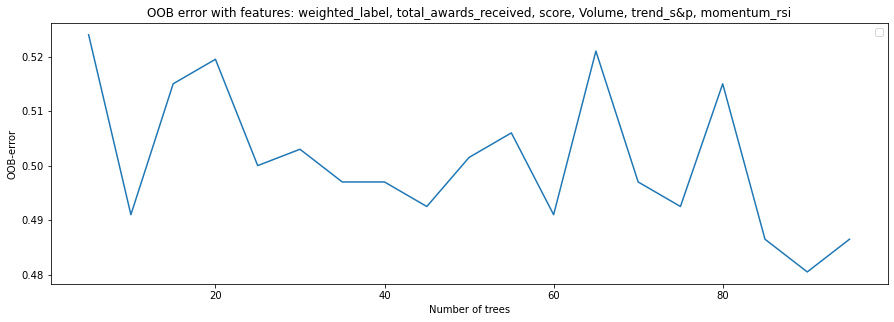

In [105]:
fig, ax = plt.subplots(1,1,figsize=(15,4.8))
ax.plot([x for x in range(5,100,5)], results_9)
ax.set_xlabel('Number of trees')
ax.set_ylabel('OOB-error')
ax.set_title('OOB error with features: weighted_label, total_awards_received, score, Volume, trend_s&p, momentum_rsi')
ax.legend()
plt.show()

In [106]:
#find the point with the highest acc+prec/2 : oob ratio
index = np.argmax(((acc+precision)/2)/results_9)
print('best number of tree: {}'.format(index*5+5))
print('accuracy: {}'.format(acc[index]))
print('precision: {}'.format(precision[index]))


best number of tree: 35
accuracy: 0.6296296296296297
precision: 0.7727954144620812


### Final Model

Our final model has the highest average accuracy and precision and a slighly lower out-of-bag-error compared to model + domain knowledge. The best number of trees was found to be 35 due to having the highest ratio of model metrics to oob-error. 